In [1]:
import numpy
import pandas
from src.data_objects import AllData
from src.functions import *

retrain = False
runchain = True

model_par = "input/fullDesign.txt"
ThisData = AllData
outdir = "/data/rjfgroup/rjf01/cameron.parker/tunes/new/"

Trimming points and obs ranges

In [2]:
trimRanges(ThisData)

In [3]:
badpoints = []
trimPoints(badpoints,ThisData)

Making Data pkl for selected observables

In [4]:
buildDataPkl(ThisData)
print(ThisData["datapkl"])

temp-pkls/data.pkl


Getting emulators

In [5]:
from src.emulator_BAND import EmulatorBAND

if retrain:
    buildObsPkls(ThisData)
    trainEmulators(model_par, ThisData)
else:
    readEmulators(ThisData)

Running Chain

In [6]:
from src.mcmc import Chain
import os

mymcmc = Chain(expdata_path=ThisData["datapkl"], model_parafile=model_par)
mymcmc.loadEmulator(getEmuPathList(ThisData))

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.pkl
[INFO][mcmc] Loading the model parameters space from input/fullDesign.txt ...
[INFO][mcmc] Run MCMC with emcee...
[INFO][mcmc] Loading the experiment data from temp-pkls/data.pkl ...
[INFO][mcmc] Experimental dataset size: 391
[INFO][mcmc] Number of Emulators: 12


In [7]:
os.environ["OMP_NUM_THREADS"] = "12"
# may have to: export RDMAV_FORK_SAFE=1 before running the code

n_effective=4000
n_active=2000
n_prior=8000
sample="tpcn"
n_max_steps=100
random_state=42

n_total = 25000
n_evidence = 0

pool = 12

if runchain:
    sampler = mymcmc.run_pocoMC(n_effective=n_effective, n_active=n_active,
                            n_prior=n_prior, sample=sample,
                            n_max_steps=n_max_steps, random_state=random_state,
                            n_total=n_total, n_evidence=n_evidence, pool=pool)

[INFO][mcmc] Generate the prior class for pocoMC ...
[INFO][mcmc] Starting pocoMC ...


Iter: 36it [9:29:17, 948.82s/it, beta=1, calls=418000, ESS=23079, logZ=-9.71e+3, logP=-9.69e+3, acc=0.756, steps=10, eff=1]    

[INFO][mcmc] Generate the posterior samples ...


[INFO][mcmc] Generate the evidence ...
Log evidence:  -9710.790943826798
Log evidence error:  None
[INFO][mcmc] Writing pocoMC chains to file...


Corner Plot

[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid c

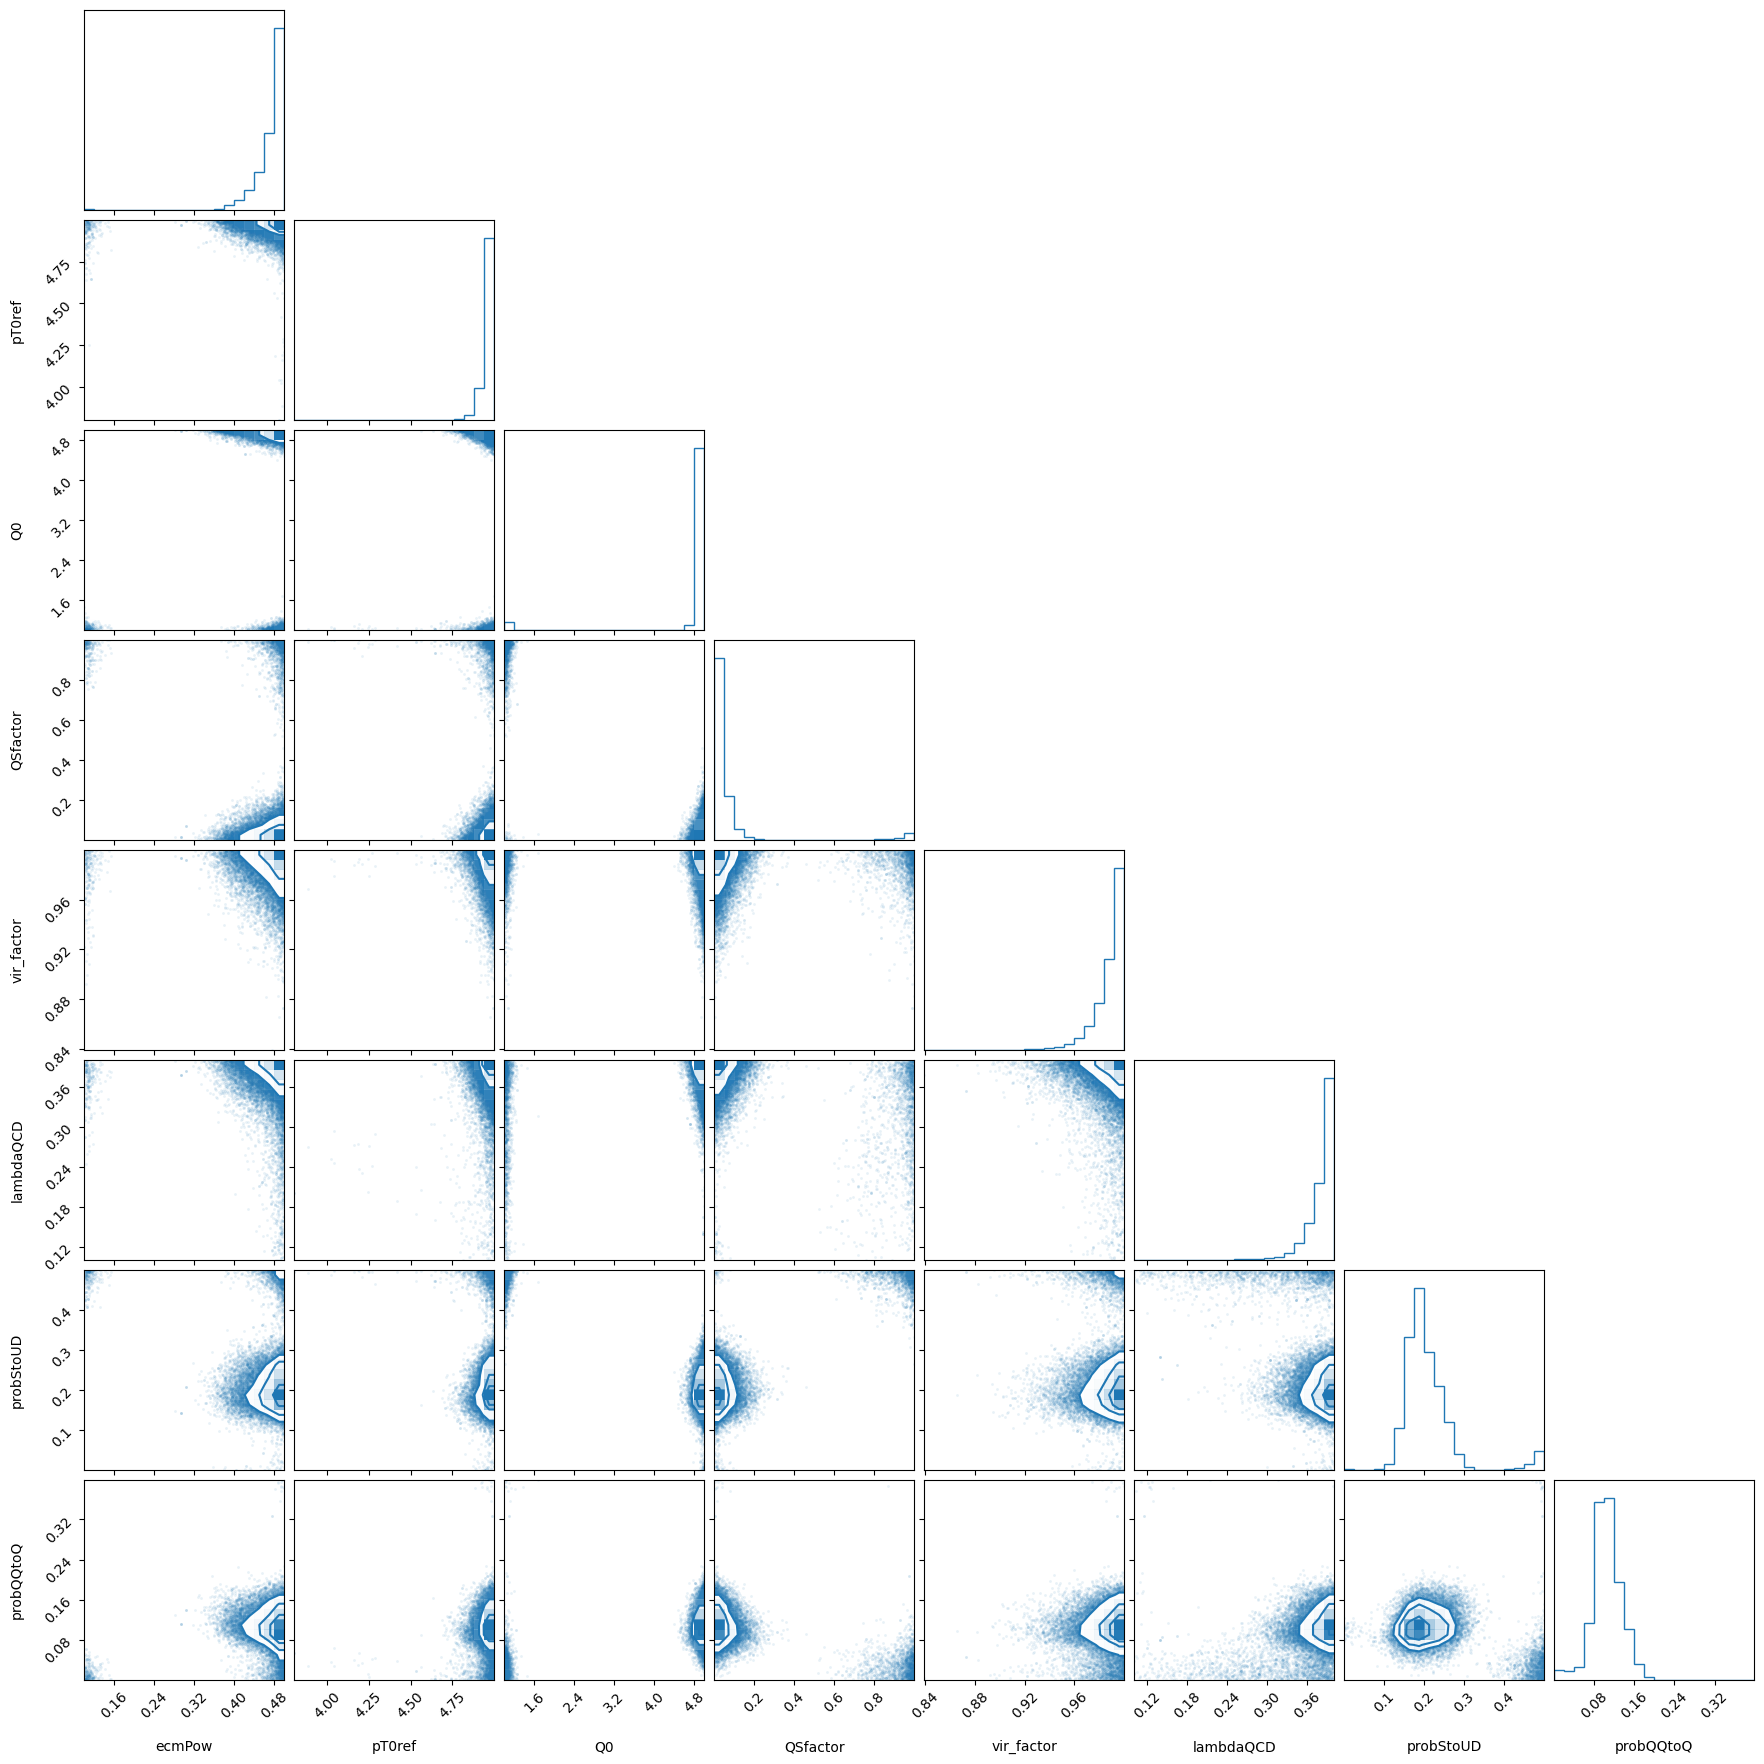

In [8]:
import pickle
import corner
import matplotlib.pyplot as plt
import numpy as np
        
with open('mcmc/chain.pkl', 'rb') as pf:
        data = pickle.load(pf)

labels = mymcmc.label

fig = corner.corner(data['chain'], weights=data['weights'], labels=labels, color="C0")
plt.show()

[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours


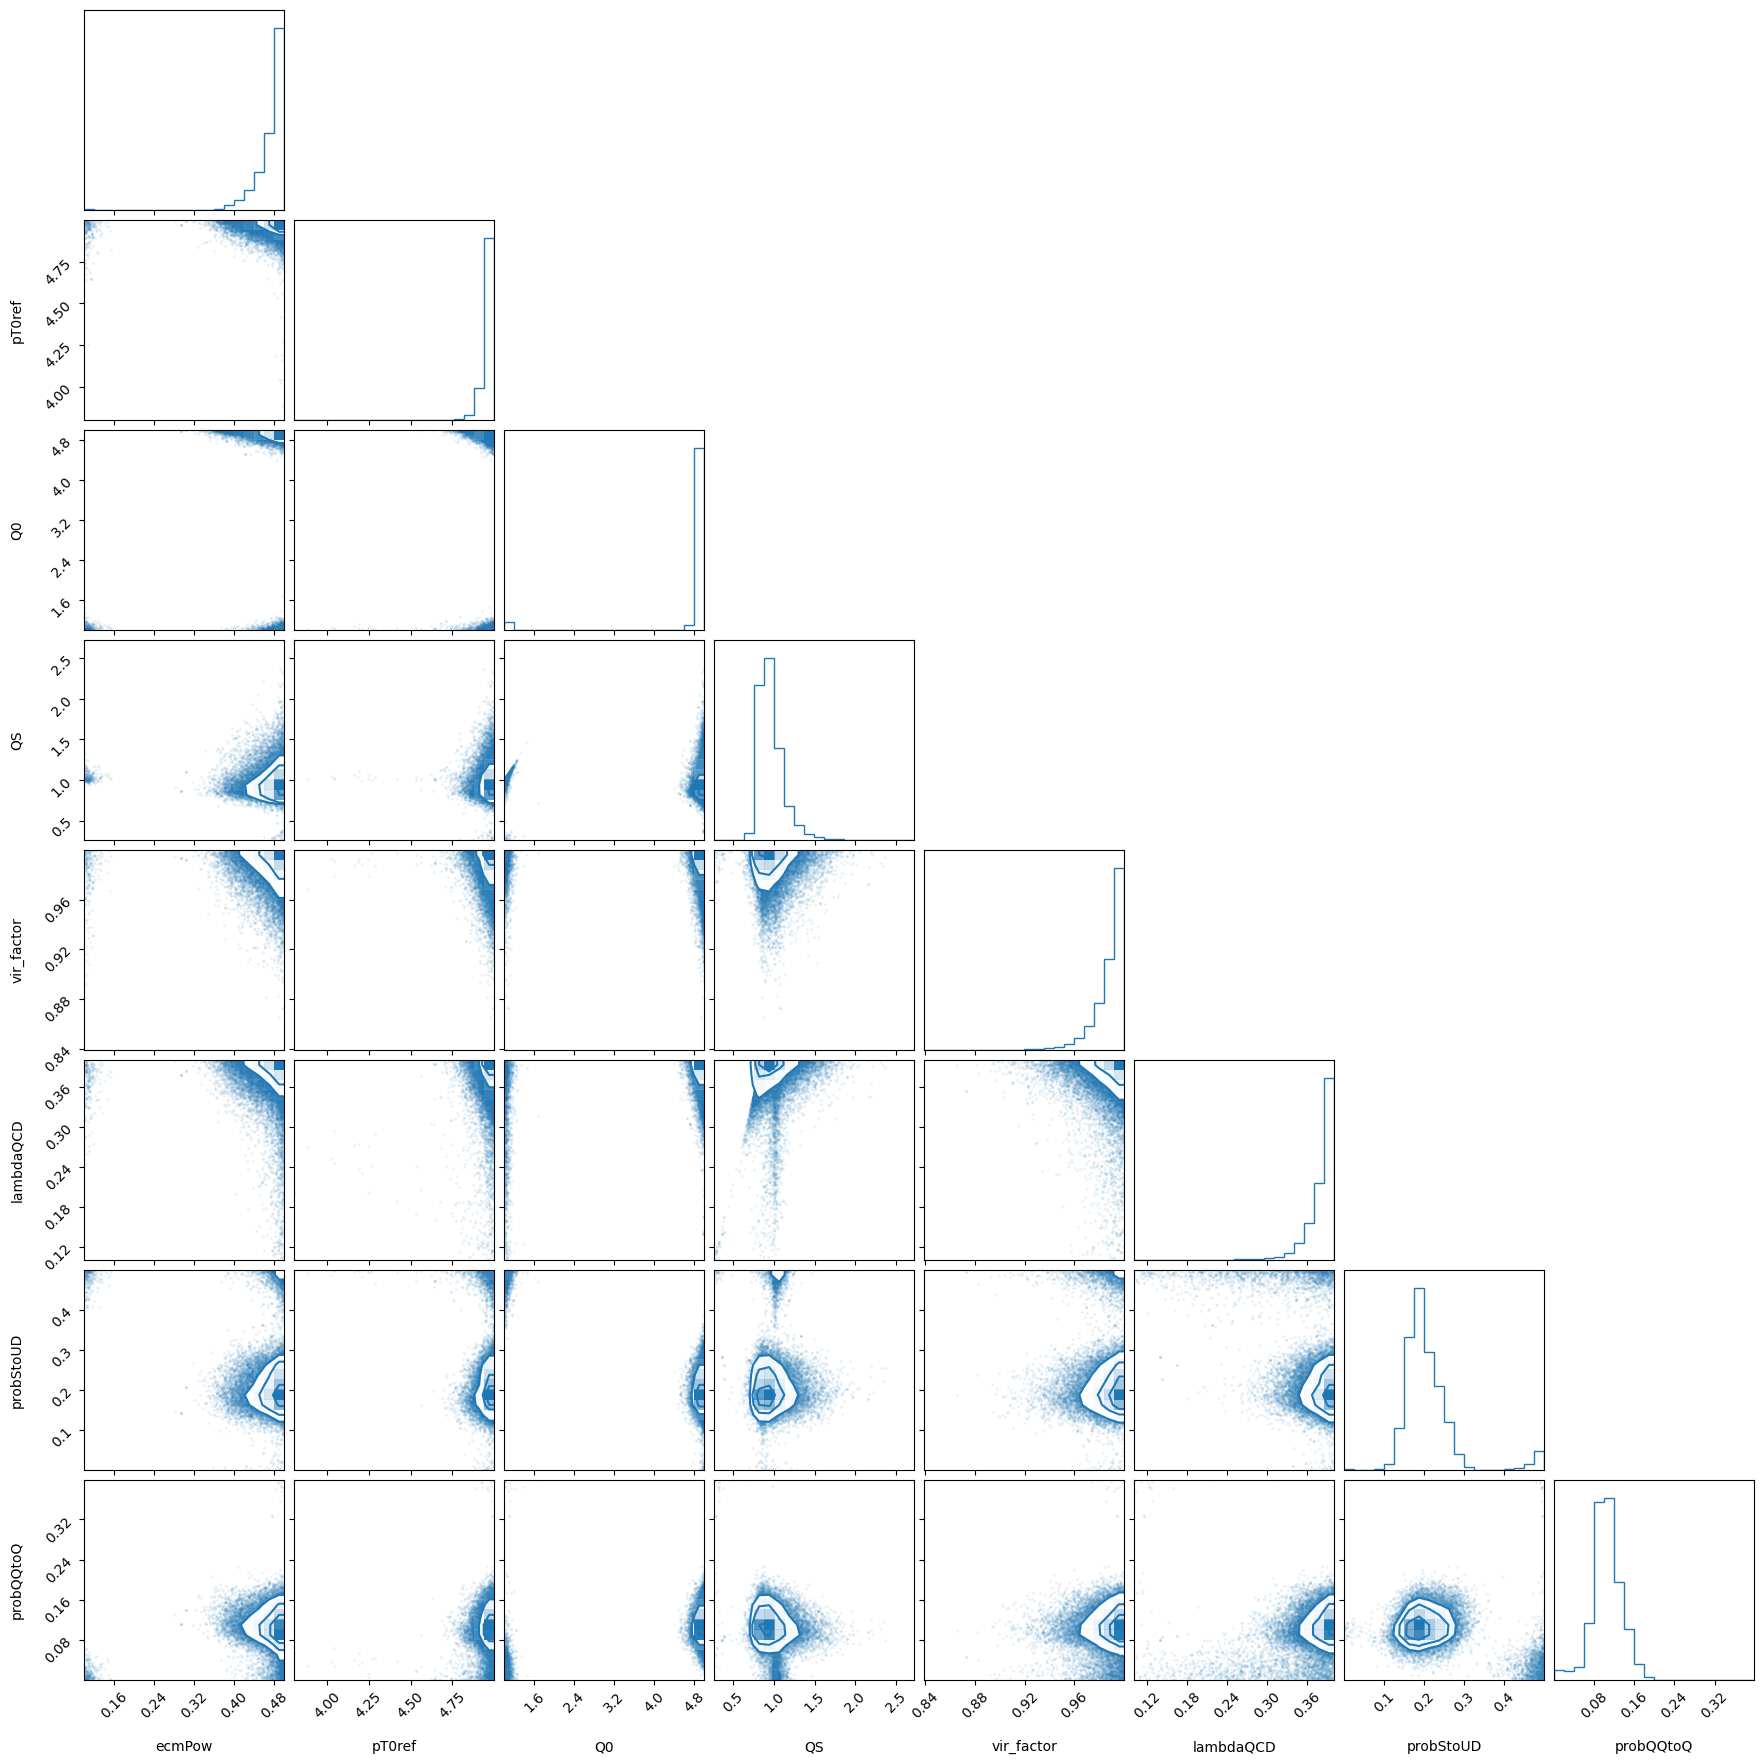

MultipartonInteractions:ecmPow: 0.481-0.070+0.017
MultipartonInteractions:pT0Ref: 4.973-0.084+0.025
Q0: 4.958-3.886+0.039
QS: 0.935-0.140+0.353
vir_factor: 0.991-0.031+0.008
lambdaQCD: 0.385-0.060+0.014
StringFlav:probStoUD: 0.198-0.055+0.269
StringFlav:probQQtoQ: 0.103-0.063+0.053


In [9]:
TransformedSamples = np.copy(data['chain'])
TransformedSamples[:,0] = data['chain'][:,0]
TransformedSamples[:,1] = data['chain'][:,1]
TransformedSamples[:,2] = data['chain'][:,2]
TransformedSamples[:,3] = (2*data['chain'][:,5]+0.05) + (data['chain'][:,2]-(2*data['chain'][:,5]+0.05))*data['chain'][:,3]
TransformedSamples[:,4] = data['chain'][:,4]
TransformedSamples[:,5] = data['chain'][:,5]
TransformedSamples[:,6] = data['chain'][:,6]
TransformedSamples[:,7] = data['chain'][:,7]

labels[3] = "QS"
fig = corner.corner(TransformedSamples, weights=data['weights'], labels=labels, color="C0")
plt.show()

bestParams = extract_parameters(TransformedSamples, ThisData["Design"]["Parameter"], outdir)

Priors

/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/functions.py:153: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[0][i].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements", color='black')
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/functions.py:154: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1][i].plot(DX, 1+(DE/DY), 'b-', linestyle = '--', color='red')
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/functions.py:154: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axes[1][i].plot(DX, 1+(DE/DY), 'b-', linestyle = '--', color='red')
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/fun

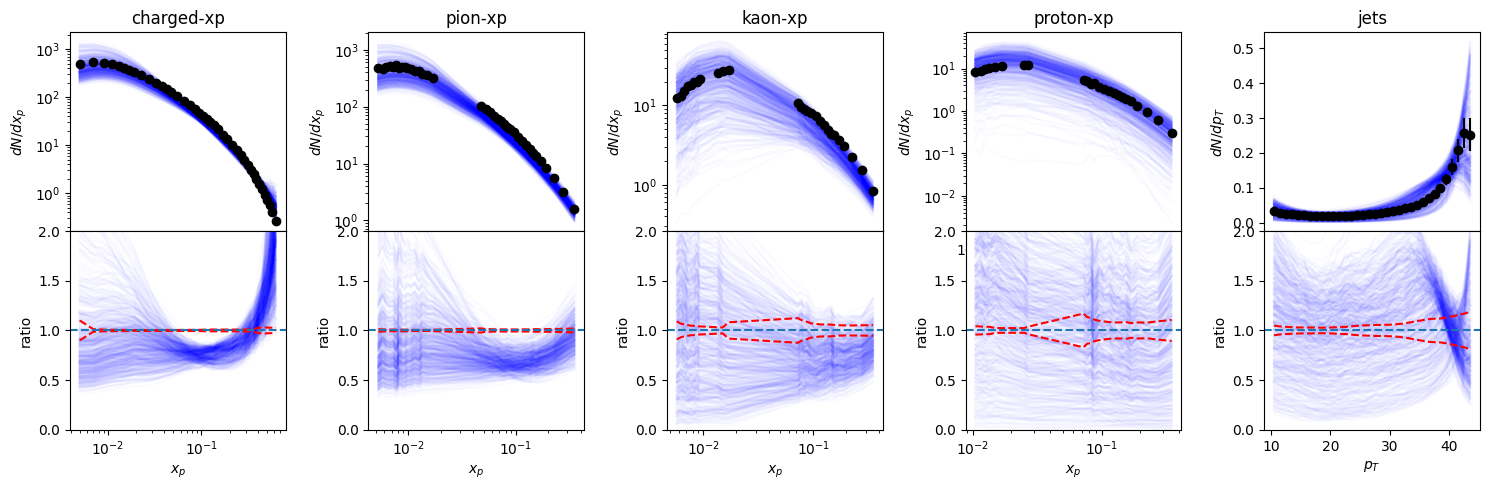

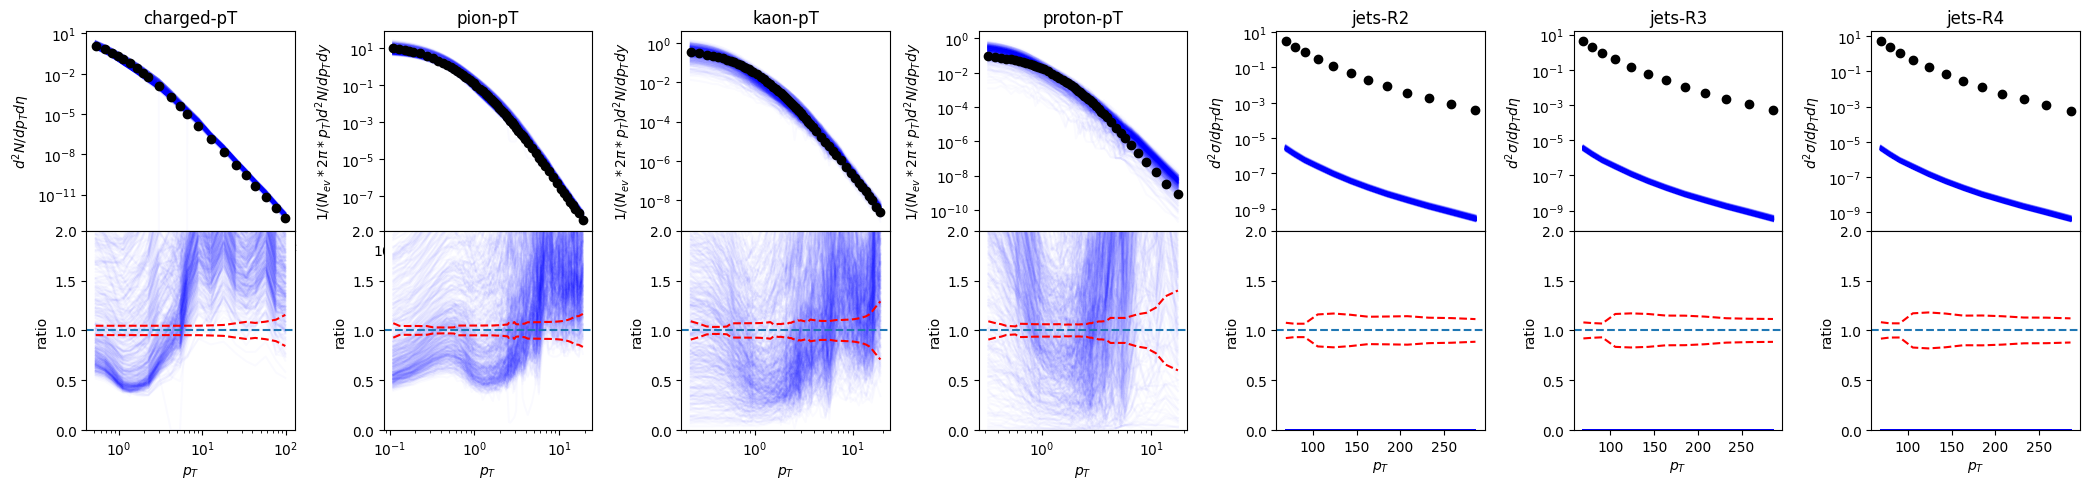

In [10]:
makeplot(ThisData, "Priors", outdir)

Posteriors

/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/functions.py:153: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[0][i].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements", color='black')
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/functions.py:154: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1][i].plot(DX, 1+(DE/DY), 'b-', linestyle = '--', color='red')
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/functions.py:154: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axes[1][i].plot(DX, 1+(DE/DY), 'b-', linestyle = '--', color='red')
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/src/fun

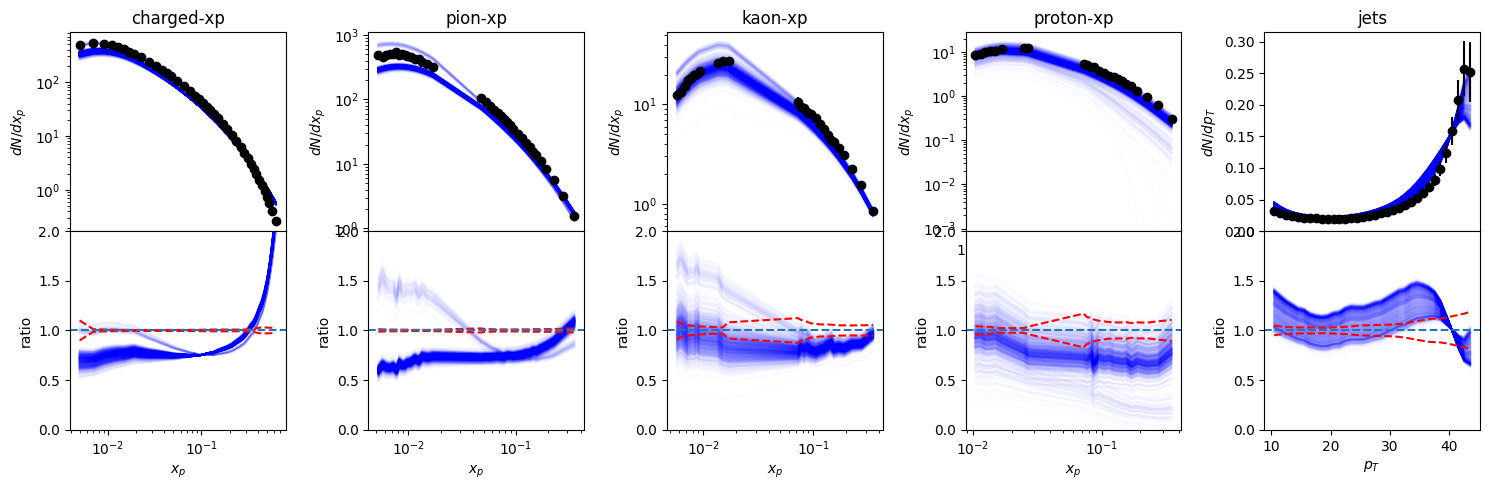

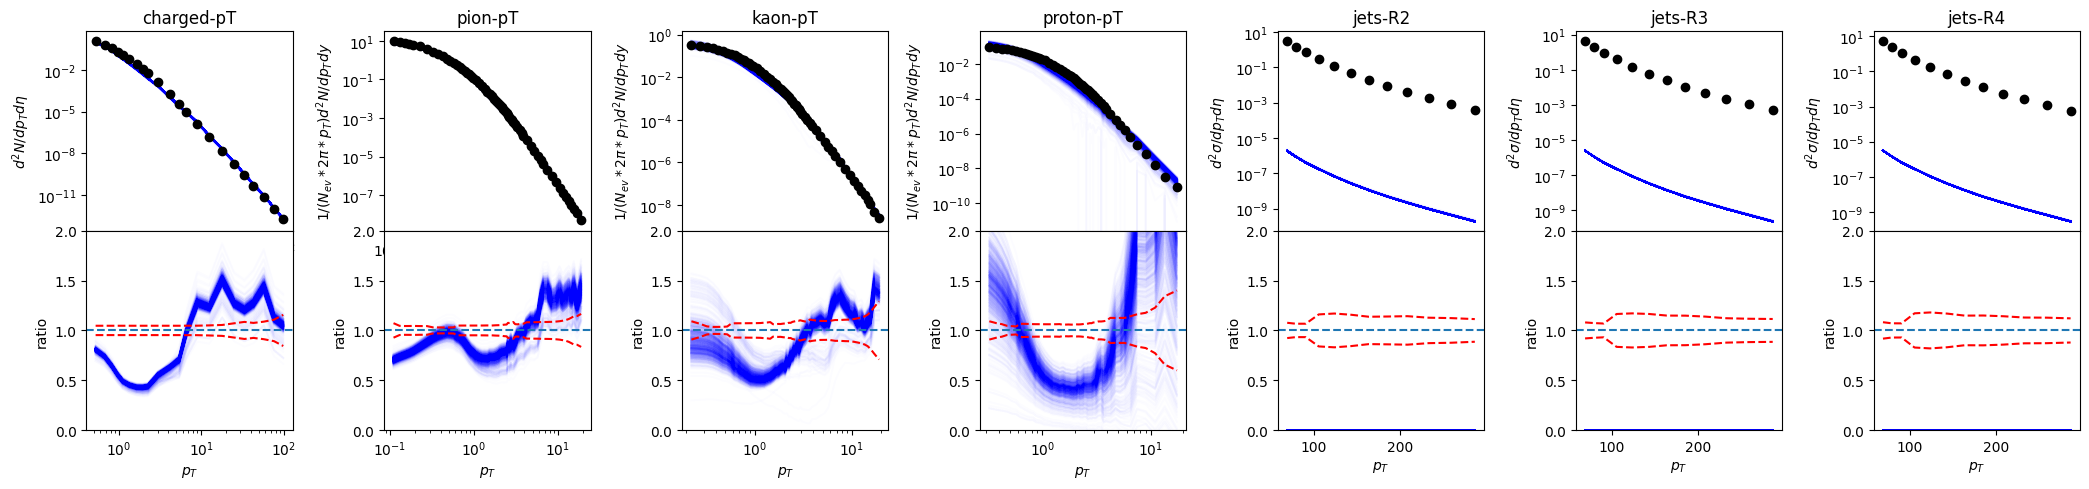

In [11]:
makeplot(ThisData, "Posteriors", outdir, samples=data["chain"])

Validation

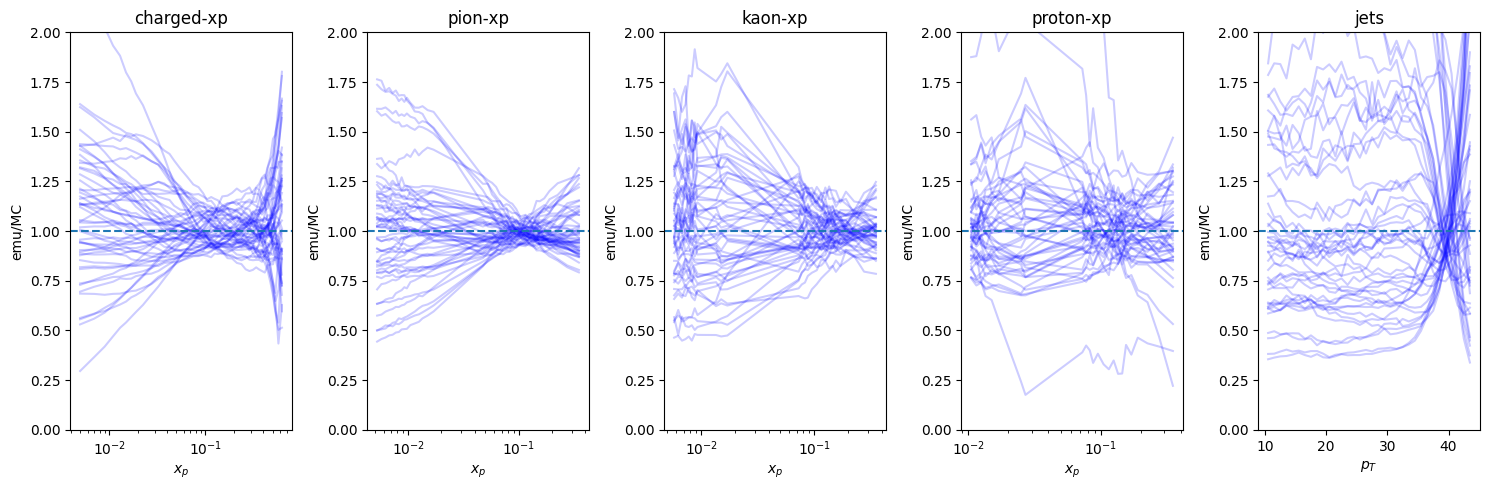

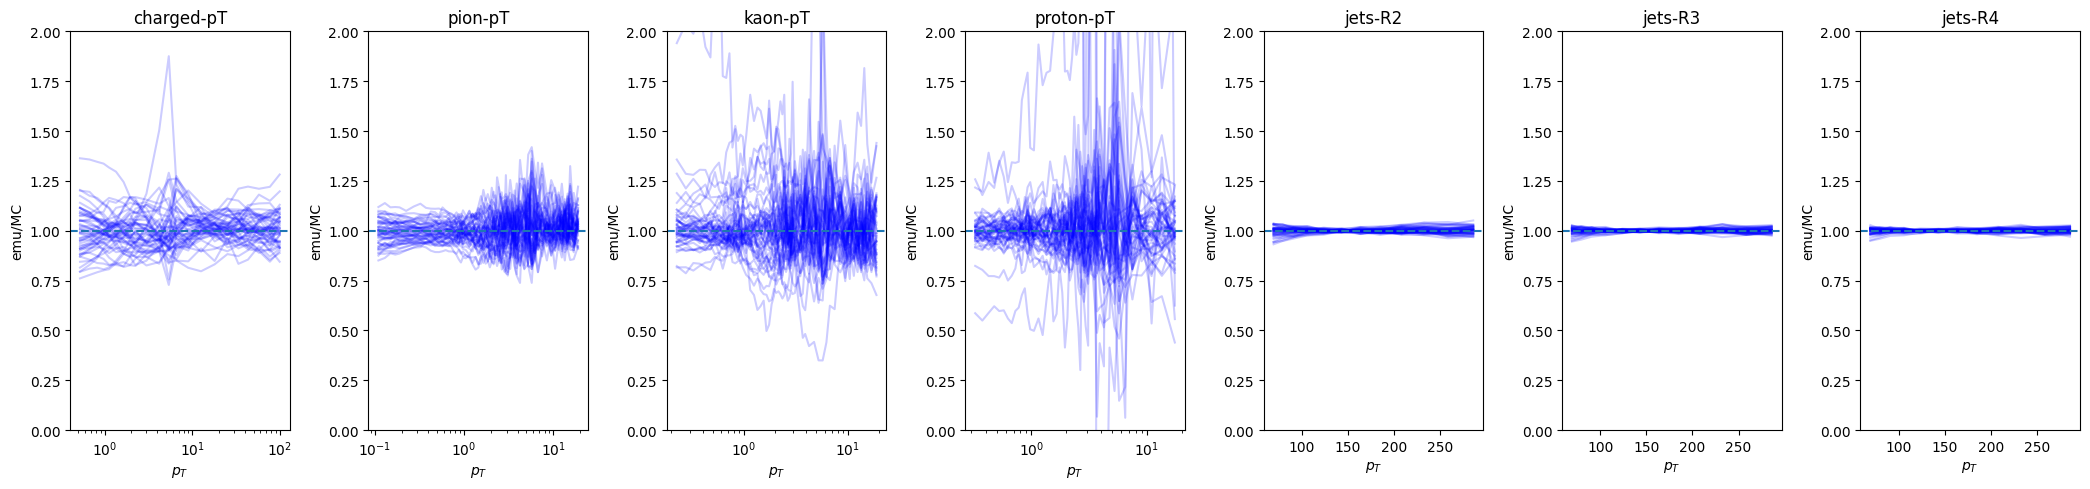

In [12]:
from src.data_objects import valData
trimRanges(valData)
validationPlots(valData, ThisData, outdir)